## Question 3

### Importing libraries

In [103]:
import numpy as np
import re
from nltk import ngrams
from collections import Counter

In [104]:
vowels = ["ा", "ि", "ी", "ु", "ू", "े", "ो", "ै", "ौ", "ृ", "ॄ", "ॉ", "ं", "्","अ", "आ", "इ", "ई", "उ", "ऊ", "ऋ", "ॠ", "ए", "ऐ", "ओ", "औ", "अं", "अः"]
punctuations=["।",";",",",":","!",'"',"?",":-","-","{","(","}",")","_","०","S","―","=","[","]","......",":-",".","॥",'”',"|"]

In [105]:
# function to find ngrams
def find_ngrams(doc, n):
  return list(zip(*(doc[i:] for i in range(n))))

In [106]:
# function to change words
def change_word(word):
    new_word = ""
    l = len(word)
    for i in range(l-1):
        new_word += word[i]
        if word[i] not in vowels and word[i+1] not in vowels and not word[i].isdigit():
            new_word += 'अ'
#     print(new_word)
#     print(l)
    new_word += word[l-1]
    if word[l-1] not in vowels and not word[l-1].isdigit():
        new_word += 'अ'
    return new_word

In [107]:
# function to split words
def split_word(word):
    temp = ""
    split_words = []
    for i in range(len(word)):
        temp += word[i]
        if word[i] in vowels:
            if word[i]=='अ' and i!=0:
                temp = temp[:-1]
            split_words.append(temp)
            temp = ""
    if temp != "":
        split_words.append(temp)
    return split_words

In [108]:
for i in "अपअने":
    print(i)

अ
प
अ
न
े


In [109]:
split_word("क्षअत्रियअ")

['क्', 'ष', 'त्', 'रि', 'य']

In [110]:
change_word('क्षत्रिय')

'क्षअत्रियअ'

In [111]:
unigrams_char = {}
bigrams_char = {}
trigrams_char = {}
quadgrams_char= {}
unigrams_words = {}
bigrams_words = {}
trigrams_words = {}
unigrams_syllables = {}
bigrams_syllables = {}
trigrams_syllables = {}

syllable_words = []

syllable_words_dict = {}
change_word_dict = {}

count = 0

In [112]:
import time

start = time.time()
print("starting time", start)
with open('hi/hi.txt',encoding= 'utf-8') as f:
    for line in f:
        syllable_words = []
        if count>500000:
            break
        count+=1
        
# -------------------- Removing unnecessary part of words -------------------
        
        new_line = ""
        for i in line:
            if i not in punctuations:
                new_line += i
        line = new_line
        line = line.replace("\n","")
        line = str(" ".join(line.split()))
    
# ---------------------------------------------------------------------------

        words = line.split(" ")
        for word in words:
            if word == "":
                continue
            try:
                if word not in change_word_dict:
                    new_word = change_word(word)
                    change_word_dict[word] = new_word
                else:
                    new_word = change_word_dict[word]

# -------------------- Finding n-grams for characters --------------------------
                
        
                for i in new_word:
                    if i not in unigrams_char:
                        unigrams_char[i]=1
                    else:
                        unigrams_char[i]+=1
                
                for i in find_ngrams(new_word, 2):
                    if i not in bigrams_char:
                        bigrams_char[i]=1
                    else:
                        bigrams_char[i]+=1
                
                for i in find_ngrams(new_word, 3):
                    if i not in trigrams_char:
                        trigrams_char[i]=1
                    else:
                        trigrams_char[i]+=1
                
                for i in find_ngrams(new_word, 4):
                    if i not in quadgrams_char:
                        quadgrams_char[i]=1
                    else:
                        quadgrams_char[i]+=1

    # ------------------- Finding n-grams for syllables ---------------------------

                if new_word not in syllable_words_dict:
                    split_words = split_word(new_word)
                    syllable_words_dict[new_word] = split_words
                else:
                    split_words = syllable_words_dict[new_word]
                
                for i in split_words:
                    if i not in unigrams_syllables:
                        unigrams_syllables[i]=1
                    else:
                        unigrams_syllables[i]+=1

                for i in find_ngrams(split_words, 2):
                    if i not in bigrams_syllables:
                        bigrams_syllables[i]=1
                    else:
                        bigrams_syllables[i]+=1

                for i in find_ngrams(split_words, 3):
                    if i not in trigrams_syllables:
                        trigrams_syllables[i]=1
                    else:
                        trigrams_syllables[i]+=1
            except:
                print("Error in word",word)
            

# -------------------- Finding n-grams for words -----------------------------
        
        for i in words:
            if i not in unigrams_words:
                unigrams_words[i]=1
            else:
                unigrams_words[i]+=1
        
        for i in find_ngrams(words, 2):
            if i not in bigrams_words:
                bigrams_words[i]=1
            else:
                bigrams_words[i]+=1

        for i in find_ngrams(words, 3):
            if i not in trigrams_words:
                trigrams_words[i]=1
            else:
                trigrams_words[i]+=1
        
print("ending time",time.time()-start)

starting time 1649866779.4951787
ending time 660.026575088501


In [113]:
count

500001

In [114]:
unigrams_char

{'आ': 347420,
 'व': 1045768,
 'े': 3404172,
 'द': 1015797,
 'अ': 12896295,
 'न': 2234776,
 'क': 3716638,
 'र': 3540695,
 'ी': 2239825,
 'ख': 279357,
 'ि': 2088294,
 'त': 1641354,
 'ा': 4656399,
 '3': 44689,
 '1': 118923,
 'ज': 923215,
 '2': 95788,
 '0': 122885,
 'ह': 1899341,
 'ै': 703758,
 'इ': 311158,
 'ु': 714660,
 'ो': 1442284,
 'म': 1763779,
 'ल': 1537914,
 'ए': 478762,
 'प': 1349473,
 '्': 2318974,
 'य': 1259541,
 'ब': 877306,
 'स': 2150322,
 'उ': 267927,
 'ं': 2011219,
 'भ': 386065,
 'ग': 801380,
 'थ': 305893,
 'ट': 533290,
 'ू': 349866,
 'च': 456426,
 'ऐ': 31226,
 'ण': 152048,
 'ध': 270045,
 'औ': 198331,
 'ृ': 41253,
 "'": 27154,
 'ष': 209860,
 'ढ': 42861,
 '़': 178055,
 'ड': 371160,
 'ठ': 72767,
 'ौ': 107622,
 'श': 497269,
 '6': 32665,
 '5': 49163,
 'ओ': 61211,
 'फ': 237013,
 'छ': 103210,
 '4': 39462,
 'ॉ': 70891,
 '“': 4298,
 '\u200d': 36031,
 'ॅ': 2863,
 'ई': 204792,
 'V': 3119,
 'I': 9346,
 'D': 6426,
 'E': 5816,
 'O': 4516,
 'ड़': 38182,
 '�': 406,
 'a': 70567,
 'i': 60437,

In [115]:
bigrams_char

{('आ', 'व'): 12750,
 ('व', 'े'): 57979,
 ('े', 'द'): 18225,
 ('द', 'अ'): 304994,
 ('अ', 'न'): 730362,
 ('न', 'अ'): 843448,
 ('क', 'अ'): 1003986,
 ('अ', 'र'): 1318324,
 ('र', 'अ'): 1952448,
 ('न', 'े'): 551141,
 ('क', 'ी'): 397282,
 ('आ', 'ख'): 3559,
 ('ख', 'ि'): 27532,
 ('ि', 'र'): 100175,
 ('र', 'ी'): 257754,
 ('त', 'ा'): 303903,
 ('ा', 'र'): 582803,
 ('ी', 'ख'): 3929,
 ('ख', 'अ'): 106106,
 ('3', '1'): 3120,
 ('ज', 'अ'): 372747,
 ('अ', 'व'): 211934,
 ('व', 'अ'): 383066,
 ('2', '0'): 38116,
 ('0', '2'): 3564,
 ('ह', 'ै'): 499491,
 ('इ', 'त'): 9751,
 ('त', 'अ'): 592005,
 ('न', 'ी'): 132362,
 ('द', 'ु'): 25300,
 ('ु', 'आ'): 24085,
 ('द', 'ो'): 50753,
 ('ह', 'अ'): 468376,
 ('अ', 'म'): 382577,
 ('म', 'ा'): 245080,
 ('र', 'े'): 172736,
 ('ल', 'ि'): 188054,
 ('ि', 'ए'): 126068,
 ('क', 'ि'): 336820,
 ('ज', 'ि'): 86782,
 ('ि', 'त'): 147621,
 ('न', 'ा'): 288499,
 ('प', '्'): 237188,
 ('्', 'य'): 328093,
 ('य', 'ा'): 498069,
 ('ु', 'न'): 50781,
 ('न', 'ि'): 141400,
 ('ि', 'य'): 299612,
 ('आ', 'प

In [116]:
trigrams_char

{('आ', 'व', 'े'): 3086,
 ('व', 'े', 'द'): 7063,
 ('े', 'द', 'अ'): 8721,
 ('द', 'अ', 'न'): 13102,
 ('अ', 'न', 'अ'): 233176,
 ('क', 'अ', 'र'): 359850,
 ('अ', 'र', 'अ'): 818382,
 ('र', 'अ', 'न'): 90070,
 ('अ', 'न', 'े'): 188976,
 ('आ', 'ख', 'ि'): 3167,
 ('ख', 'ि', 'र'): 3196,
 ('ि', 'र', 'ी'): 4006,
 ('त', 'ा', 'र'): 18906,
 ('ा', 'र', 'ी'): 71113,
 ('र', 'ी', 'ख'): 1412,
 ('ी', 'ख', 'अ'): 2455,
 ('ज', 'अ', 'न'): 63952,
 ('न', 'अ', 'व'): 20586,
 ('अ', 'व', 'अ'): 66564,
 ('व', 'अ', 'र'): 72440,
 ('अ', 'र', 'ी'): 73202,
 ('2', '0', '2'): 1494,
 ('0', '2', '0'): 1217,
 ('इ', 'त', 'अ'): 6516,
 ('त', 'अ', 'न'): 24530,
 ('अ', 'न', 'ी'): 62303,
 ('द', 'ु', 'आ'): 388,
 ('ह', 'अ', 'म'): 51848,
 ('अ', 'म', 'ा'): 63720,
 ('म', 'ा', 'र'): 49314,
 ('ा', 'र', 'े'): 25444,
 ('ल', 'ि', 'ए'): 90808,
 ('ज', 'ि', 'त'): 7853,
 ('ि', 'त', 'अ'): 94016,
 ('अ', 'न', 'ा'): 147864,
 ('प', '्', 'य'): 5073,
 ('्', 'य', 'ा'): 120971,
 ('य', 'ा', 'र'): 16186,
 ('ा', 'र', 'अ'): 301648,
 ('द', 'ु', 'न'): 5797,
 ('ु', 'न

In [117]:
quadgrams_char

{('आ', 'व', 'े', 'द'): 2937,
 ('व', 'े', 'द', 'अ'): 5309,
 ('े', 'द', 'अ', 'न'): 3943,
 ('द', 'अ', 'न', 'अ'): 9517,
 ('क', 'अ', 'र', 'अ'): 271278,
 ('अ', 'र', 'अ', 'न'): 77481,
 ('र', 'अ', 'न', 'े'): 57859,
 ('आ', 'ख', 'ि', 'र'): 3153,
 ('ख', 'ि', 'र', 'ी'): 1386,
 ('त', 'ा', 'र', 'ी'): 3091,
 ('ा', 'र', 'ी', 'ख'): 1208,
 ('र', 'ी', 'ख', 'अ'): 1112,
 ('ज', 'अ', 'न', 'अ'): 33597,
 ('अ', 'न', 'अ', 'व'): 5622,
 ('न', 'अ', 'व', 'अ'): 9305,
 ('अ', 'व', 'अ', 'र'): 13910,
 ('व', 'अ', 'र', 'ी'): 6978,
 ('2', '0', '2', '0'): 926,
 ('इ', 'त', 'अ', 'न'): 6033,
 ('त', 'अ', 'न', 'ी'): 3996,
 ('ह', 'अ', 'म', 'ा'): 11629,
 ('अ', 'म', 'ा', 'र'): 15105,
 ('म', 'ा', 'र', 'े'): 7329,
 ('ज', 'ि', 'त', 'अ'): 7220,
 ('ि', 'त', 'अ', 'न'): 5115,
 ('त', 'अ', 'न', 'ा'): 8154,
 ('प', '्', 'य', 'ा'): 3438,
 ('्', 'य', 'ा', 'र'): 5220,
 ('य', 'ा', 'र', 'अ'): 9370,
 ('द', 'ु', 'न', 'ि'): 5742,
 ('ु', 'न', 'ि', 'य'): 6700,
 ('न', 'ि', 'य', 'ा'): 11445,
 ('आ', 'प', 'अ', 'क'): 21978,
 ('प', 'अ', 'क', 'ो'): 11081,
 ('द

In [118]:
f = open("top_uni_char.txt",'w',encoding='utf-8')
f.write(str(sorted(unigrams_char, key=unigrams_char.get, reverse=True)[:100]))
f.close()

In [119]:
f = open("top_bi_char.txt",'w',encoding='utf-8')
f.write(str(sorted(bigrams_char, key=bigrams_char.get, reverse=True)[:100]))
f.close()

In [120]:
f = open("top_tri_char.txt",'w',encoding='utf-8')
f.write(str(sorted(trigrams_char, key=trigrams_char.get, reverse=True)[:100]))
f.close()

In [121]:
f = open("top_quad_char.txt",'w',encoding='utf-8')
f.write(str(sorted(quadgrams_char, key=quadgrams_char.get, reverse=True)[:100]))
f.close()

In [122]:
unigrams_words

{'आवेदन': 2528,
 'करने': 49869,
 'की': 327162,
 'आखिरी': 1360,
 'तारीख': 1004,
 '31': 1489,
 'जनवरी': 2991,
 '2020': 784,
 'है': 352622,
 'इतनी': 1733,
 'दुआ': 190,
 'कर': 75244,
 'दो': 15586,
 'हमारे': 5753,
 'लिए': 82748,
 'कि': 129400,
 'जितना': 796,
 'प्यार': 1940,
 'दुनिया': 5088,
 'ने': 171832,
 'आपको': 10392,
 'दिया': 35075,
 'बस': 3940,
 'उतना': 582,
 'ही': 68335,
 'हमें': 4355,
 'भी': 108232,
 'मिल': 5956,
 'जाए': 5434,
 'मोदी': 10420,
 'सरकार': 26202,
 'के': 531818,
 'पहले': 24034,
 'कार्यकाल': 870,
 'में': 401599,
 'तीन': 9099,
 'तलाक': 648,
 'को': 244191,
 'लेकर': 17167,
 'बिल': 1564,
 'लाया': 820,
 'गया': 50422,
 'था': 52427,
 'हालांकि': 6323,
 'तब': 5835,
 'यह': 51887,
 'राज्यसभा': 844,
 'पास': 10646,
 'नहीं': 78928,
 'हो': 58843,
 'पाया': 2376,
 'भाजपा': 8941,
 'दिवंगत': 181,
 'नेता': 6615,
 'प्रमोद': 282,
 'महाजन': 240,
 'बेटी': 2325,
 'पूनम': 274,
 'सचिव': 2830,
 'बनाया': 3761,
 'ऐसी': 4795,
 'स्थिति': 4592,
 'एक': 83202,
 'न्यायपूर्ण': 11,
 'सार्वजनिक': 1420,
 'वित्त'

In [123]:
bigrams_words

{('आवेदन', 'करने'): 323,
 ('करने', 'की'): 7314,
 ('की', 'आखिरी'): 159,
 ('आखिरी', 'तारीख'): 81,
 ('तारीख', '31'): 12,
 ('31', 'जनवरी'): 107,
 ('जनवरी', '2020'): 151,
 ('2020', 'है'): 7,
 ('इतनी', 'दुआ'): 1,
 ('दुआ', 'कर'): 8,
 ('कर', 'दो'): 110,
 ('दो', 'हमारे'): 6,
 ('हमारे', 'लिए'): 287,
 ('लिए', 'कि'): 57,
 ('कि', 'जितना'): 24,
 ('जितना', 'प्यार'): 4,
 ('प्यार', 'दुनिया'): 2,
 ('दुनिया', 'ने'): 41,
 ('ने', 'आपको'): 38,
 ('आपको', 'दिया'): 4,
 ('दिया', 'है'): 6900,
 ('है', 'बस'): 181,
 ('बस', 'उतना'): 2,
 ('उतना', 'ही'): 332,
 ('ही', 'हमें'): 53,
 ('हमें', 'भी'): 51,
 ('भी', 'मिल'): 216,
 ('मिल', 'जाए'): 91,
 ('मोदी', 'सरकार'): 1305,
 ('सरकार', 'के'): 3766,
 ('के', 'पहले'): 1616,
 ('पहले', 'कार्यकाल'): 23,
 ('कार्यकाल', 'में'): 310,
 ('में', 'भी'): 7776,
 ('भी', 'तीन'): 46,
 ('तीन', 'तलाक'): 251,
 ('तलाक', 'को'): 41,
 ('को', 'लेकर'): 10071,
 ('लेकर', 'बिल'): 6,
 ('बिल', 'लाया'): 4,
 ('लाया', 'गया'): 364,
 ('गया', 'था'): 6573,
 ('था', 'हालांकि'): 120,
 ('हालांकि', 'तब'): 25,
 ('तब', 'य

In [124]:
trigrams_words

{('आवेदन', 'करने', 'की'): 83,
 ('करने', 'की', 'आखिरी'): 36,
 ('की', 'आखिरी', 'तारीख'): 62,
 ('आखिरी', 'तारीख', '31'): 5,
 ('तारीख', '31', 'जनवरी'): 3,
 ('31', 'जनवरी', '2020'): 7,
 ('जनवरी', '2020', 'है'): 2,
 ('इतनी', 'दुआ', 'कर'): 1,
 ('दुआ', 'कर', 'दो'): 1,
 ('कर', 'दो', 'हमारे'): 2,
 ('दो', 'हमारे', 'लिए'): 1,
 ('हमारे', 'लिए', 'कि'): 1,
 ('लिए', 'कि', 'जितना'): 1,
 ('कि', 'जितना', 'प्यार'): 2,
 ('जितना', 'प्यार', 'दुनिया'): 1,
 ('प्यार', 'दुनिया', 'ने'): 1,
 ('दुनिया', 'ने', 'आपको'): 1,
 ('ने', 'आपको', 'दिया'): 1,
 ('आपको', 'दिया', 'है'): 1,
 ('दिया', 'है', 'बस'): 2,
 ('है', 'बस', 'उतना'): 1,
 ('बस', 'उतना', 'ही'): 2,
 ('उतना', 'ही', 'हमें'): 1,
 ('ही', 'हमें', 'भी'): 2,
 ('हमें', 'भी', 'मिल'): 1,
 ('भी', 'मिल', 'जाए'): 3,
 ('मोदी', 'सरकार', 'के'): 259,
 ('सरकार', 'के', 'पहले'): 11,
 ('के', 'पहले', 'कार्यकाल'): 11,
 ('पहले', 'कार्यकाल', 'में'): 17,
 ('कार्यकाल', 'में', 'भी'): 5,
 ('में', 'भी', 'तीन'): 7,
 ('भी', 'तीन', 'तलाक'): 4,
 ('तीन', 'तलाक', 'को'): 26,
 ('तलाक', 'को', 'लेकर'

In [125]:
f = open("top_uni_words.txt",'w',encoding='utf-8')
f.write(str(sorted(unigrams_words, key=unigrams_words.get, reverse=True)[:100]))
f.close()

In [126]:
f = open("top_bi_words.txt",'w',encoding='utf-8')
f.write(str(sorted(bigrams_words, key=bigrams_words.get, reverse=True)[:100]))
f.close()

In [127]:
f = open("top_tri_words.txt",'w',encoding='utf-8')
f.write(str(sorted(trigrams_words, key=trigrams_words.get, reverse=True)[:100]))
f.close()

In [128]:
unigrams_syllables

{'आ': 339337,
 'वे': 56205,
 'द': 304976,
 'न': 843435,
 'क': 1003929,
 'र': 1952433,
 'ने': 551136,
 'की': 397276,
 'खि': 27531,
 'री': 257752,
 'ता': 303902,
 'ख': 106092,
 '31': 1507,
 'ज': 372715,
 'व': 383023,
 '2020': 818,
 'है': 499489,
 'इ': 307934,
 'त': 591993,
 'नी': 132361,
 'दु': 25299,
 'दो': 50747,
 'ह': 468348,
 'मा': 245057,
 'रे': 172733,
 'लि': 188052,
 'ए': 429605,
 'कि': 336803,
 'जि': 86777,
 'ना': 288493,
 'प्': 237103,
 'या': 498065,
 'नि': 141380,
 'प': 668888,
 'को': 342534,
 'दि': 141260,
 'ब': 407463,
 'स': 858253,
 'उ': 266396,
 'ही': 228472,
 'मे': 497419,
 'ं': 1656147,
 'भी': 148515,
 'मि': 98765,
 'ल': 548619,
 'जा': 211283,
 'मो': 41495,
 'दी': 82118,
 'का': 524468,
 'के': 682586,
 'ले': 221867,
 'र्': 386432,
 'य': 462577,
 'ती': 124746,
 'ला': 232616,
 'बि': 44108,
 'ग': 339244,
 'था': 103981,
 'हा': 214607,
 'रा': 334672,
 'ज्': 45789,
 'भा': 118562,
 'पा': 142012,
 'हो': 194803,
 'वं': 19098,
 'म': 534004,
 'बे': 34651,
 'टी': 71924,
 'पू': 53542,


In [129]:
bigrams_syllables

{('आ', 'वे'): 3077,
 ('वे', 'द'): 5309,
 ('द', 'न'): 9517,
 ('क', 'र'): 271276,
 ('र', 'ने'): 57859,
 ('आ', 'खि'): 3138,
 ('खि', 'री'): 1386,
 ('ता', 'री'): 3091,
 ('री', 'ख'): 1112,
 ('ज', 'न'): 33586,
 ('न', 'व'): 9302,
 ('व', 'री'): 6978,
 ('इ', 'त'): 6484,
 ('त', 'नी'): 3996,
 ('दु', 'आ'): 388,
 ('ह', 'मा'): 11628,
 ('मा', 'रे'): 7329,
 ('लि', 'ए'): 90808,
 ('जि', 'त'): 7220,
 ('त', 'ना'): 8154,
 ('प्', 'या'): 3438,
 ('या', 'र'): 9370,
 ('दु', 'नि'): 5741,
 ('नि', 'या'): 11445,
 ('आ', 'प'): 47933,
 ('प', 'को'): 11081,
 ('दि', 'या'): 36099,
 ('ब', 'स'): 5721,
 ('उ', 'त'): 3753,
 ('ह', 'मे'): 7797,
 ('मे', 'ं'): 435635,
 ('मि', 'ल'): 26503,
 ('जा', 'ए'): 24010,
 ('मो', 'दी'): 10813,
 ('स', 'र'): 51709,
 ('र', 'का'): 46944,
 ('का', 'र'): 69410,
 ('प', 'ह'): 41275,
 ('ह', 'ले'): 24301,
 ('का', 'र्'): 34741,
 ('र्', 'य'): 28168,
 ('य', 'का'): 2634,
 ('का', 'ल'): 7480,
 ('ती', 'न'): 10012,
 ('त', 'ला'): 3642,
 ('ला', 'क'): 3847,
 ('ले', 'क'): 17440,
 ('बि', 'ल'): 2413,
 ('ला', 'या'): 309

In [130]:
trigrams_syllables

{('आ', 'वे', 'द'): 2919,
 ('वे', 'द', 'न'): 3454,
 ('क', 'र', 'ने'): 50209,
 ('आ', 'खि', 'री'): 1367,
 ('ता', 'री', 'ख'): 1071,
 ('ज', 'न', 'व'): 3061,
 ('न', 'व', 'री'): 3068,
 ('इ', 'त', 'नी'): 1747,
 ('ह', 'मा', 'रे'): 5901,
 ('जि', 'त', 'ना'): 807,
 ('प्', 'या', 'र'): 2016,
 ('दु', 'नि', 'या'): 5725,
 ('आ', 'प', 'को'): 10466,
 ('उ', 'त', 'ना'): 585,
 ('ह', 'मे', 'ं'): 4528,
 ('स', 'र', 'का'): 31921,
 ('र', 'का', 'र'): 33842,
 ('प', 'ह', 'ले'): 24168,
 ('का', 'र्', 'य'): 20161,
 ('र्', 'य', 'का'): 1920,
 ('य', 'का', 'ल'): 969,
 ('त', 'ला', 'क'): 762,
 ('ले', 'क', 'र'): 17251,
 ('हा', 'ला', 'ं'): 6411,
 ('ला', 'ं', 'कि'): 6417,
 ('रा', 'ज्', 'य'): 12932,
 ('ज्', 'य', 'स'): 863,
 ('य', 'स', 'भा'): 880,
 ('न', 'ही', 'ं'): 79435,
 ('भा', 'ज', 'पा'): 9367,
 ('दि', 'वं', 'ग'): 188,
 ('वं', 'ग', 'त'): 183,
 ('प्', 'र', 'मो'): 797,
 ('र', 'मो', 'द'): 298,
 ('म', 'हा', 'ज'): 266,
 ('हा', 'ज', 'न'): 247,
 ('पू', 'न', 'म'): 279,
 ('स', 'चि', 'व'): 3962,
 ('ब', 'ना', 'या'): 3783,
 ('स्', 'थि', 

In [131]:
f = open("top_uni_char.txt",'w',encoding='utf-8')
f.write(str(sorted(unigrams_syllables, key=unigrams_syllables.get, reverse=True)[:100]))
f.close()

In [132]:
f = open("top_uni_syllables.txt",'w',encoding='utf-8')
f.write(str(sorted(bigrams_syllables, key=bigrams_syllables.get, reverse=True)[:100]))
f.close()

In [133]:
f = open("top_tri_syllables.txt",'w',encoding='utf-8')
f.write(str(sorted(trigrams_syllables, key=trigrams_syllables.get, reverse=True)[:100]))
f.close()

## Question 4

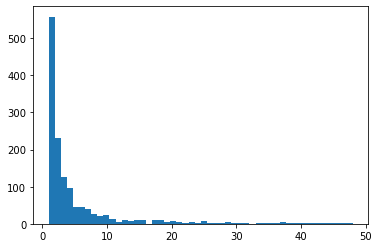

In [134]:
import matplotlib.pyplot as plt

#convert value of frequency to numpy array
s = list(unigrams_char.values())
s = np.array(s)

#Calculate zipf and plot the data
count, bins, ignored = plt.hist(s[s<50], 50)
plt.show()

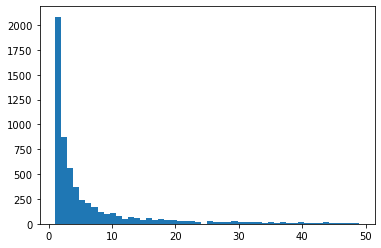

In [135]:
#convert value of frequency to numpy array
s = list(bigrams_char.values())
s = np.array(s)

#Calculate zipf and plot the data
count, bins, ignored = plt.hist(s[s<50], 50)
plt.show()

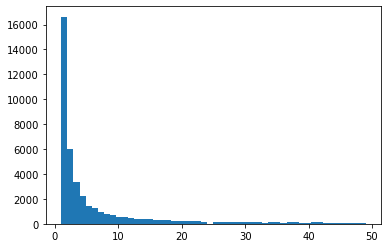

In [136]:
#convert value of frequency to numpy array
s = list(trigrams_char.values())
s = np.array(s)

#Calculate zipf and plot the data
count, bins, ignored = plt.hist(s[s<50], 50)
plt.show()

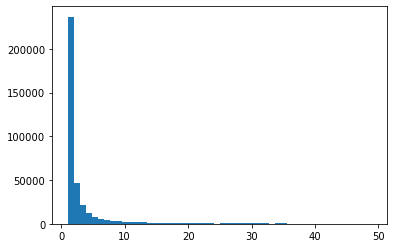

In [137]:
#convert value of frequency to numpy array
s = list(unigrams_words.values())
s = np.array(s)

#Calculate zipf and plot the data
count, bins, ignored = plt.hist(s[s<50], 50)
plt.show()

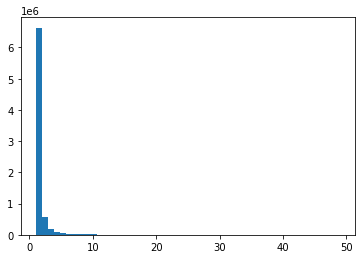

In [138]:
#convert value of frequency to numpy array
s = list(trigrams_words.values())
s = np.array(s)

#Calculate zipf and plot the data
count, bins, ignored = plt.hist(s[s<50], 50)
plt.show()

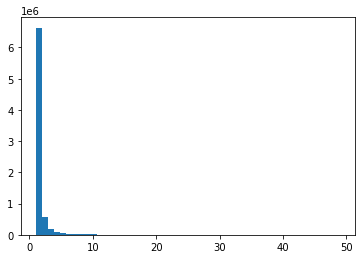

In [139]:
#convert value of frequency to numpy array
s = list(trigrams_words.values())
s = np.array(s)

#Calculate zipf and plot the data
count, bins, ignored = plt.hist(s[s<50], 50)
plt.show()

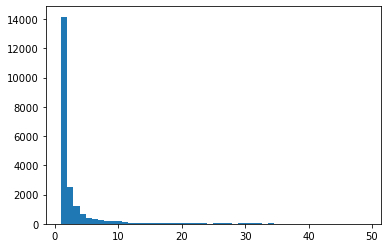

In [140]:
#convert value of frequency to numpy array
s = list(unigrams_syllables.values())
s = np.array(s)

#Calculate zipf and plot the data
count, bins, ignored = plt.hist(s[s<50], 50)
plt.show()

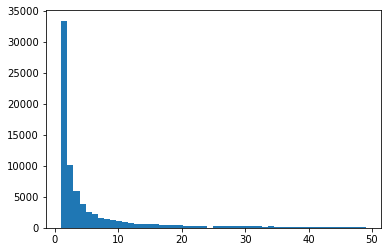

In [141]:
#convert value of frequency to numpy array
s = list(bigrams_syllables.values())
s = np.array(s)

#Calculate zipf and plot the data
count, bins, ignored = plt.hist(s[s<50], 50)
plt.show()

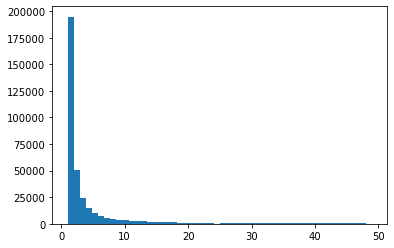

In [142]:
#convert value of frequency to numpy array
s = list(trigrams_syllables.values())
s = np.array(s)

#Calculate zipf and plot the data
count, bins, ignored = plt.hist(s[s<50], 50)
plt.show()

### All of the above follow Zipfian distribution